Você foi acionado para construir uma árvore de decisão que será implementada em um ChatBot. Este ChatBot será usado no primeiro contato com o cliente que deseja informações a respeito do serviço de limpeza residencial.

Sendo assim, você deverá construir uma árvore de decisão utilizando como base as principais perguntas sobre qual a necessidade do cliente e as informações básicas para realização do serviço, como tamanho da residência, número de cômodos, localização, etc.

Inicialmente, vamos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Como não encontrei o dataset dito na descrição do MAPA, tomei liberdade de criar um com dados fictícios.

In [ ]:
import random

# Definindo os bairros e suas classificações
bairros = ['Bairro A', 'Bairro B', 'Bairro C', 'Bairro D', 'Bairro E', 'Bairro F', 'Bairro G']
classificacao_bairros = {
    'Bairro A': 'Região Simples',
    'Bairro B': 'Região Média',
    'Bairro C': 'Região Premium',
    'Bairro D': 'Região Simples',
    'Bairro E': 'Região Média',
    'Bairro F': 'Região Premium',
    'Bairro G': 'Região Simples'
}

# Função para gerar dados fictícios
def generate_data(n):
    data = []
    for _ in range(n):
        num_comodos = random.randint(1, 10)
        bairro = random.choice(bairros)
        tipo_area_limpeza = random.choice(['Interior', 'Quintal', 'Ambos'])
        tipo_limpeza = random.choice(['Superficial', 'Pesada'])

        # Cálculo do valor do serviço baseado nos critérios
        if tipo_area_limpeza == 'Ambos':
            area_limpeza = 'Ambos'
        else:
            area_limpeza = tipo_area_limpeza

        if area_limpeza == 'Ambos':
            valor_servico = (num_comodos * 100) + (tipo_limpeza == 'Pesada') * 50
        else:
            valor_servico = (num_comodos * 100) + (tipo_limpeza == 'Pesada') * 50 + (area_limpeza == 'Quintal') * 30

        valor_servico *= 1.5 if classificacao_bairros[bairro] == 'Região Média' else 2 if classificacao_bairros[bairro] == 'Região Premium' else 1

        data.append([num_comodos, bairro, tipo_area_limpeza, tipo_limpeza, valor_servico])

    return data

# Gerar os dados
data = generate_data(100)

# Criar o dataframe
df = pd.DataFrame(data, columns=['Tamanho da casa por numero de cômodos',
                                 'Localização da casa por bairros',
                                 'Area da Limpeza no interior, no quintal ou ambos?',
                                 'Tipo de Limpeza superficial ou pesada?',
                                 'Valor do serviço'])

# Mostrar o dataframe
df


,Tamanho da casa por numero de cômodos,Localização da casa por bairros,"Area da Limpeza no interior, no quintal ou ambos?",Tipo de Limpeza superficial ou pesada?,Valor do serviço
0,7,Bairro G,Ambos,Superficial,700.0
1,1,Bairro B,Interior,Superficial,150.0
2,8,Bairro A,Ambos,Superficial,800.0
3,5,Bairro B,Quintal,Pesada,870.0
4,7,Bairro D,Ambos,Pesada,750.0
...,...,...,...,...,...
95,3,Bairro B,Ambos,Pesada,525.0
96,4,Bairro B,Quintal,Pesada,720.0
97,3,Bairro C,Ambos,Pesada,700.0
98,10,Bairro D,Quintal,Superficial,1030.0


**Resumo do Dataset**
1. Tamanho da casa por numero de cômodos (quanto mais comodos, mais caro);
2. Localização da casa por bairros (Separados como região simples, região média e região premium);
3. Area da Limpeza no interior, no quintal ou ambos? (Podendo ser lipeza dentro de casa, quintal ou ambos)
4. Tipo de Limpeza superficial ou pesada? (Superficial é o que chamamos de "Manter a limpeza", enquanto que pesada é a limpeza mais detalhada, com lavagem e muitas vezes levantar móveis)
5. Valor do serviço (valores com base no numero de comodos, tipo de limpeza, area da limpeza e localização  da casa)

------------------------------------------------------------------

Abaixo precisamos separar em 4 pacotes de lipeza, dadas como Limpeza Simples, Limpeza Regular, Limpeza Premium e Limpeza Gold, com base no valor a ser pago, para isso vamos analisar os quartis da coluna "Valor do Serviço" e as informações estatística da coluna.

count     100.000000
mean      770.550000
std       386.696639
min       150.000000
25%       525.000000
50%       750.000000
75%       981.250000
max      1960.000000
Name: Valor do serviço, dtype: float64


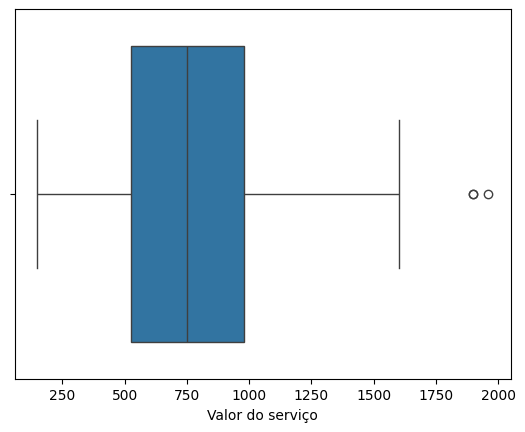

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Valor do serviço'])

print(df['Valor do serviço'].describe())

In [ ]:
'''Como os valores são aleatórios,
cada vez que rodar o codigo eles mudarão,
por isso vou deixar fixo as variáveis que separam os quartis.'''

min =  df['Valor do serviço'].min()
q1 = df['Valor do serviço'].quantile(0.25)
q2 = df['Valor do serviço'].quantile(0.5)
q3 = df['Valor do serviço'].quantile(0.75)
max = df['Valor do serviço'].max()

In [ ]:
classif_limpeza = []
for valor in df['Valor do serviço']:
  if valor >= min and valor < q1:
    limpeza = "Limpeza Simples"
  elif valor >= q1 and valor < q2:
    limpeza = "Limpeza Regular"
  elif valor >= q2 and valor < q3:
    limpeza = "Limpeza Premium"
  elif q3 >= 1397:
    limpeza = "Limpeza Gold"
  else:
    ...
  classif_limpeza.append(limpeza)

Feito isso, vamos adicionar ao nosso dataframe para que nosso modelo tenha apenas 4 opções de saída final.

In [ ]:
df['Classificação da Limpeza'] = classif_limpeza

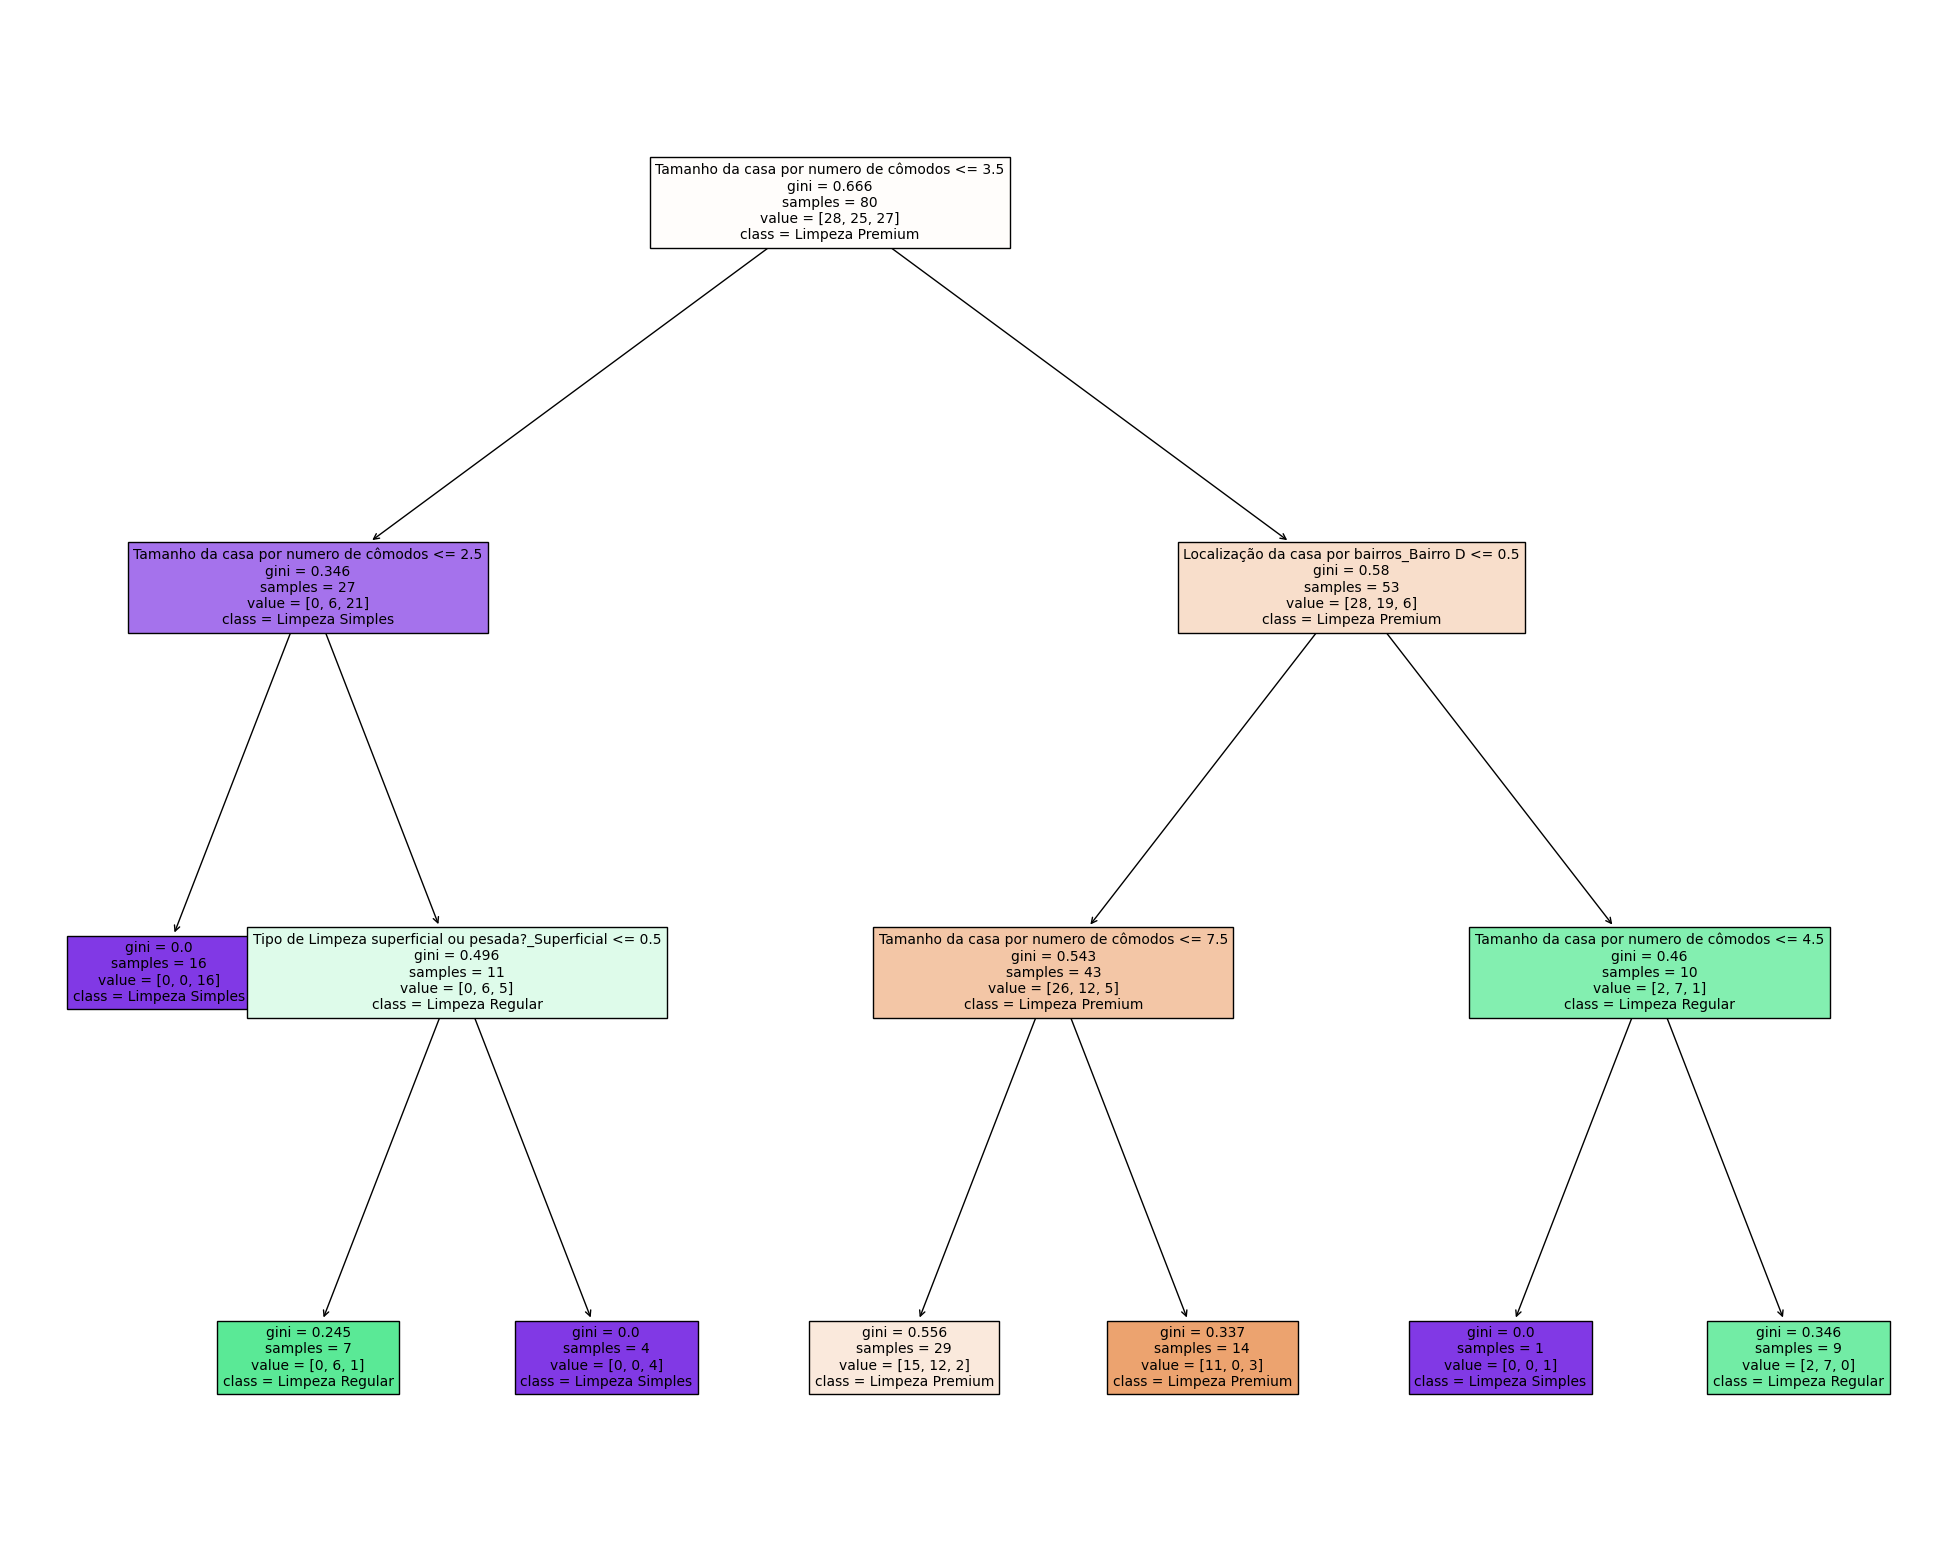

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Transformando as variáveis categóricas em variáveis dummy
df_encoded = pd.get_dummies(df, columns=['Localização da casa por bairros',
                                         'Area da Limpeza no interior, no quintal ou ambos?',
                                         'Tipo de Limpeza superficial ou pesada?'])

# Dividindo os dados em conjunto de treinamento e teste
X = df_encoded.drop(columns=['Classificação da Limpeza', 'Valor do serviço'])
y = df_encoded['Classificação da Limpeza']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de árvore de decisão com max_depth limitado
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(X_train, y_train)

# Plotando a árvore de decisão
plt.figure(figsize=(25,20)) #Largura x Altura
plot_tree(tree_classifier, filled=True, feature_names=X.columns, class_names=tree_classifier.classes_, fontsize=10)
plt.show()

## Gerando o ChatBot

In [ ]:
# Receber novos inputs do usuário
tamanho_casa = int(input("Digite o tamanho da casa por número de cômodos: "))
bairro = input("Digite o bairro da casa: ")
area_limpeza = input("Digite a área da limpeza (Interior, Quintal, Ambos): ")
tipo_limpeza = input("Digite o tipo de limpeza (Superficial ou Pesada): ")

# Criar um novo dataframe com os novos inputs
novo_input = pd.DataFrame([[tamanho_casa, bairro, area_limpeza, tipo_limpeza]],
                          columns=['Tamanho da casa por numero de cômodos',
                                   'Localização da casa por bairros',
                                   'Area da Limpeza no interior, no quintal ou ambos?',
                                   'Tipo de Limpeza superficial ou pesada?'])

# Codificar as variáveis categóricas nos novos inputs da mesma forma que foi feito no dataframe original
novo_input_encoded = pd.get_dummies(novo_input)

# Garantir que as colunas nos novos inputs correspondam às colunas usadas para treinar o modelo
colunas_faltantes = set(X.columns) - set(novo_input_encoded.columns)
for coluna in colunas_faltantes:
    novo_input_encoded[coluna] = 0

# Reordenar as colunas para que correspondam à ordem utilizada durante o treinamento do modelo
novo_input_encoded = novo_input_encoded[X.columns]

# Fazer a previsão usando o modelo treinado
previsao = tree_classifier.predict(novo_input_encoded)

# Imprimir a previsão
print("Sugiro que contrate o pacote de ", previsao[0])


Digite o tamanho da casa por número de cômodos: 5
Digite o bairro da casa: Bairro A
Digite a área da limpeza (Interior, Quintal, Ambos): Interior
Digite o tipo de limpeza (Superficial ou Pesada): Pesada
Sugiro que contrate o pacote de  Limpeza Premium


--------------------------------------------------------


Feito por Renan Cunha de Oliveira